In [2]:
# import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame 
from pylab import rcParams
from sklearn import preprocessing
import xgboost as xgb
model = xgb.XGBClassifier()
from xgboost.sklearn import XGBClassifier 
from sklearn import metrics
from sklearn.metrics import classification_report

In [3]:
# read url
Url="https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv"
titanic = pd.read_csv(Url)

In [5]:
titanic.columns =['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# drop columns(PassengerId','Ticket','Name','Cabin','Embarked')
df = titanic.drop(columns = ['PassengerId','Ticket','Name','Cabin','Embarked'])

In [7]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [8]:
#  null values count
df.isnull().values.sum()

177

In [9]:
#Function to remove the null values from age column and making it as categorical type
def removenullfromAge(df):
    df.Age = df.Age.fillna(-0.5)
    bins = (-1, 0, 5, 12, 18, 25, 35, 60, 120)
    group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
    categories = pd.cut(df.Age, bins, labels=group_names)
    df.Age = categories
    return df

In [10]:
# null removalfrom age column 
df=removenullfromAge(df)

In [11]:
# verifying null values in the dataframe
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [12]:
# Making fares column as categorical using Bins
bins = (-1, 0, 8, 15, 31, 1000)
group_names = ['Unknown', 'Low_Fare', 'Med_fare', 'High_Fare', 'Very_High_Fare']
categories = pd.cut(df.Fare, bins, labels=group_names)
df.Fare = categories

In [14]:
df['Sex'],uniq = pd.factorize(df['Sex'])
df['Fare'],uniq = pd.factorize(df['Fare'])
df['Age'],uniq = pd.factorize(df['Age'])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,0,1,0,0
1,1,1,1,1,1,0,1
2,1,3,1,2,0,0,0
3,1,1,1,2,1,0,1
4,0,3,0,2,0,0,2


In [15]:

# Classifying dependent and independent variables in to Y,X
y=df['Survived']
X=df.drop('Survived',axis=1)

In [20]:
from sklearn.model_selection import train_test_split
#Splitting train(70%) and test(30%) data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1234)

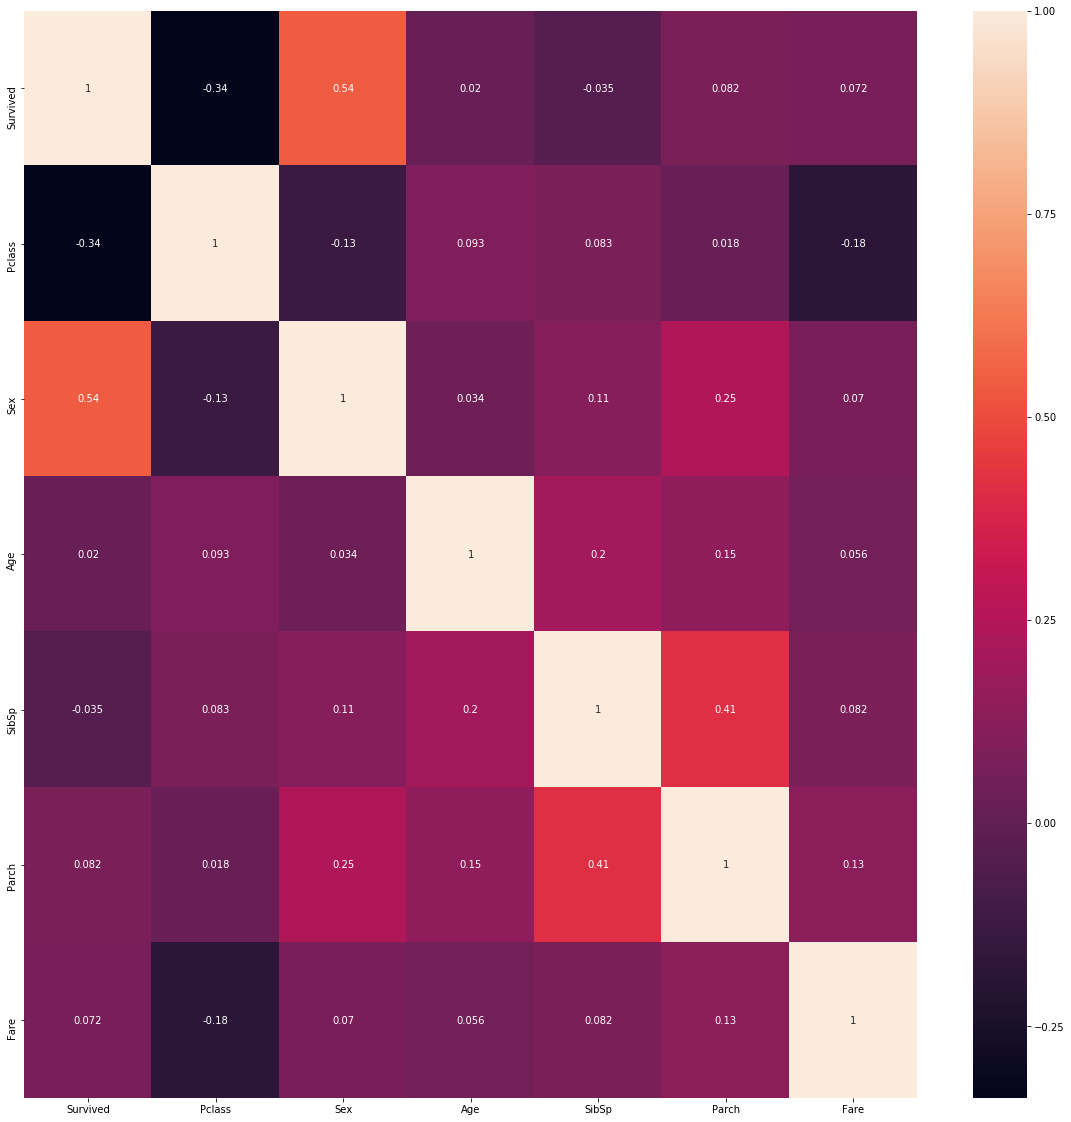

In [21]:
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(df.corr(),annot=True)

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [23]:
sc=StandardScaler()
X=sc.fit_transform(X)

C:\Users\nn\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\nn\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [24]:
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
param_grid = dict(learning_rate=learning_rate)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=10)

In [25]:
# learning the training data and fitting them 
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_log_loss', verbose=0)

In [26]:
top_param=grid_search.best_estimator_

In [28]:
best_model=XGBClassifier(learning_rate=top_param.learning_rate,booster=top_param.booster,gamma=top_param.gamma,n_estimators=top_param.n_estimators)

In [29]:
best_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [30]:
best_model.score(X_train, y_train)

0.8523274478330658

In [31]:
# fitting againist test data
best_model.score(X_test,y_test)

0.8283582089552238